# PREDICTION DES RETARDS DE VOL

## SOMMAIRE
- Introduction
- Rappel détaillée des colonnes
- Résumé de l'exploration des données
- Analyse
  - Import des librairies 
  - Chargement des données
  - Analyse de la forme des données
    - Types de données
    - Heatmap
  - Analyse de fond
    - Supression des colonnes non utilisables
    - Examen de la colonne target
    - Histogrames des variables continues
      - Variables quantitatives (float)
      - Variables quantitatives (interger)
      - Variables qualitatives (object)
  - Hypothèses


---

## INTRODUCTION

Les retards de vols constituent une problématique majeure dans le secteur aérien, impactant non seulement les passagers, mais aussi les compagnies aériennes et les aéroports. Selon le Bureau of Transportation Statistics des États-Unis, environ 19 % des vols ont été retardés en 2019, engendrant des coûts économiques estimés à 28 milliards de dollars.

Face à cette complexité, le recours à des approches basées sur les données, telles que l’analyse prédictive, devient essentiel pour anticiper et gérer efficacement les retards.

C’est dans cette optique que le Bureau of Transportation Statistics a mis à disposition un jeu de données, sur lequel nous allons mener une analyse approfondie afin de déterminer s’il est possible d’entraîner un modèle de prédiction des retards de vols, et le cas échéant, d’identifier la meilleure approche à adopter.

---

## RAPPEL DÉTAILLÉE DES COLONNES

Variables temporelles
- **​DAY_OF_WEEK** : Jour de la semaine (1 = lundi, 7 = dimanche)​
- **​FL_DATE** : Date complète du vol (format AAAA-MM-JJ)​​

Informations sur le vol
- **​UNIQUE_CARRIER** : Code unique du transporteur (ex. : 'AA' pour American Airlines)​
- **​AIRLINE_ID** : Identifiant numérique de la compagnie aérienne​
- **​CARRIER** : Code du transporteur​
- **​TAIL_NUM** : Numéro de queue de l'avion​
- **​FL_NUM** : Numéro du vol​

Aéroport d'origine
- **​ORIGIN_AIRPORT_ID** : Identifiant de l'aéroport d'origine​
- **​ORIGIN_AIRPORT_SEQ_ID** : Identifiant de séquence de l'aéroport d'origine​
- **​ORIGIN_CITY_MARKET_ID** : Identifiant du marché de la ville d'origine​
- **​ORIGIN** : Code IATA de l'aéroport d'origine (ex. : 'JFK')​
- **​ORIGIN_CITY_NAME** : Nom de la ville d'origine​
- **​ORIGIN_STATE_ABR** : Abréviation de l'État d'origine​
- **​ORIGIN_STATE_FIPS** : Code FIPS de l'État d'origine​
- **​ORIGIN_STATE_NM** : Nom complet de l'État d'origine​
- **​ORIGIN_WAC** : Code de zone de l'aéroport d'origine​​

Aéroport de destination
- **DEST_AIRPORT_ID** : Identifiant de l'aéroport de destination​
- **​DEST_AIRPORT_SEQ_ID** : Identifiant de séquence de l'aéroport de destination​
- **​DEST_CITY_MARKET_ID** : Identifiant du marché de la ville de destination​
- **​DEST** : Code IATA de l'aéroport de destination​
- **​DEST_CITY_NAME** : Nom de la ville de destination​
- **​DEST_STATE_ABR** : Abréviation de l'État de destination​
- **​DEST_STATE_FIPS** : Code FIPS de l'État de destination​
- **​DEST_STATE_NM** : Nom complet de l'État de destination​
- **​DEST_WAC** : Code de zone de l'aéroport de destination​

Horaires et retards
- **​CRS_DEP_TIME** : Heure de départ prévue (au format HHMM)​
- **​DEP_TIME** : Heure réelle de départ​
- **​DEP_DELAY** : Retard au départ en minutes (négatif si en avance)​
- **​DEP_DELAY_NEW** : Retard au départ, avec 0 pour les retards ≤ 0​
- **​DEP_DEL15** : Indicateur de retard au départ ≥ 15 minutes (1 = oui, 0 = non)​
- **​DEP_DELAY_GROUP** : Groupe de retard au départ (par tranches de 15 minutes)​
- **​DEP_TIME_BLK** : Plage horaire du départ (ex. : '0600-0659')​
- **​TAXI_OUT** : Temps de roulage avant le décollage (en minutes)​
- **​WHEELS_OFF** : Heure de décollage (roues quittant le sol)​
- **​WHEELS_ON** : Heure d'atterrissage (roues touchant le sol)​
- **​TAXI_IN** : Temps de roulage après l'atterrissage (en minutes)​
- **​CRS_ARR_TIME** : Heure d'arrivée prévue​
- **​ARR_TIME** : Heure réelle d'arrivée​
- **​ARR_DELAY** : Retard à l'arrivée en minutes​
- **​ARR_DELAY_NEW** : Retard à l'arrivée, avec 0 pour les retards ≤ 0​
- **​ARR_DEL15** : Indicateur de retard à l'arrivée ≥ 15 minutes (1 = oui, 0 = non)​
- **​ARR_DELAY_GROUP** : Groupe de retard à l'arrivée (par tranches de 15 minutes)​
- **​ARR_TIME_BLK** : Plage horaire de l'arrivée (ex. : '0900-0959')​

Annulations et détournements
- **CANCELLED** : Indicateur d'annulation du vol (1 = oui, 0 = non)​
- **​CANCELLATION_CODE** : Code de la raison de l'annulation (A = transporteur, B = météo, C =NAS, D = sécurité)​
- **DIVERTED** : Indicateur de vol détourné (1 = oui, 0 = non)​​

Durées et distances
- **​CRS_ELAPSED_TIME** : Durée prévue du vol (en minutes)​
- **​ACTUAL_ELAPSED_TIME** : Durée réelle du vol (en minutes)​
- **​AIR_TIME** : Temps de vol effectif (en minutes)

---

## ANALYSE

### RÉSUMÉ DE L'EXPLORATION DES DONNÉES

Ici, nous présenterons l’ensemble des informations que nous jugeons importantes à préciser. Il s’agira en quelque sorte du résumé final de notre analyse.

#### Objectif :
- Comprendre du mieux possible nos données
- Développer une première stratégie de modélisation 

#### Analyse de Forme :
- **Variable target** : ARR_DEL15 
- **Lignes et colonnes** : 445827 lignes et 65 colonnes
- **Types de variables** : Qualitatives : 50, Quantitatives : 15
- **Analyse des valeurs manquantes** :
  - Le dataset est plutot complet. Il y assez peu de valeurs NaN.
  - Seulement 9 colonnes sur 65 ne pourrons pas être utilisés car taux de NaN supérieur à 90%
    - CARRIER_DELAY
    - LATE_AIRCRAFT_DELAY
    - WEATHER_DELAY
    - NAS_DELAY
    - SECURITY_DELAY
    - CANCELLATION_CODE
    - FIRST_DEP_TIME
    - TOTAL_ADD_GTIME
    - LONGEST_ADD_GTIME

#### Analyse de Fond :
- **Visualisation de la target** :
  - 16% d'avions en retard (70882 / 433298)

- **Signification des variables** :

  - UNIQUE_CARRIER / CARRIERE : Colonnes identiques. Cela ne semble pas pertinent de conserver les deux. 
  - ORIGIN / ORIGIN_CITY_NAME : Colonnes identiques. Cela ne semble pas pertinent de conserver les deux. ORIGIN_CITY_NAME est plus précis.
  - ORIGIN_STATE / ORIGIN_STATE_NM : Colonnes identiques. Cela ne semble pas pertinent de conserver les deux. ORIGIN_STATE_NM est plus précis.
  - DEST / DEST_CITY_NAME : Colonnes identiques. Cela ne semble pas pertinent de conserver les deux. DEST_CITY_NAME est plus précis.
  - DEST_STATE_ABR / DEST_STATE_NM : Colonnes identiques. Cela ne semble pas pertinent de conserver les deux. DEST_STATE_NM est plus précis.


  Variables clés :
  - DEP_DELAY, ARR_DELAY, DEP_DEL15, ARR_DEL15 : mesures principales du retard.
  - CANCELLED, DIVERTED : indicateurs d'événements exceptionnels.
  - DEP_TIME_BLK, ARR_TIME_BLK : plages horaires normalisées utiles pour catégoriser le trafic.
  - UNIQUE_CARRIER, ORIGIN, DEST : identifiants des opérateurs et des lieux, souvent déséquilibrés.

- **Relation Variables / Target** :
  - DEP_DELAY, DEP_DEL15 : Très forte corrélation : un retard au départ mène souvent à un retard à l’arrivée.
  - DEP_DELAY_GROUP : Même logique : plus le groupe est élevé, plus la probabilité que l'avion 
  - ARR_DELAY / ARR_DELAY_NEW : Directement liées, mais inutilisables comme features (elles sont postérieures à l’arrivée).
  - CANCELLED, DIVERTED : Peu de cas, mais à exclure ou à gérer car ils biaisent la target (pas d'arrivée réelle)
  - DEP_TIME_BLK, ARR_TIME_BLK : Certaines heures de la journée sont plus sujettes aux retards (ex : pics de trafic).
  - DISTANCE, DISTANCE_GROUP : Les longs vols ont plus de chances de retard (mais pas toujours).
  - AIRLINE_ID, UNIQUE_CARRIER : Certaines compagnies ont plus de retards que d'autres (ex : low cost).
  - ORIGIN, DEST : Certains aéroports (ex : hubs encombrés) génèrent plus de retard.

- **NaN analyse** : 
  - Présence de valeurs manquantes dans : ARR_TIME, ARR_DELAY, WHEELS_ON, TAXI_IN, souvent liées à des vols annulés ou détournés

#### Hypotheses : 

- ✅ H1 : Retards selon la plage horaire de départ (DEP_TIME_BLK)
- ✅ H2 : Retard au départ = retard à l’arrivée (DEP_DELAY vs ARR_DELAY)
- ✅ H3 : Taux de retard par compagnie (UNIQUE_CARRIER)
- ✅ H4 : Taux de retard par aéroport d’origine (ORIGIN)
- ✅ H5 : Taux de retard selon plage horaire d’arrivée (ARR_TIME_BLK)
- ❌ H6 : Plus la distance d’un vol est grande, plus il a de risques d’être en retard (DISTANCE_GROUP)

---

### IMPORT DES LIBRAIRIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from skimpy import skim

---

### CHARGEMENT DES DONNÉES

Nos données sont réparties dans plusieurs fichiers (un fichier par mois de l’année 2016). \
Nous allons donc, dans un premier temps, essayer d'agréger l'ensemble des csv à notre disposition dans un seul et unique dataframe (csv)

In [2]:
# Panda library display setting for greater visual comfort
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
# Load all CSVs into the "dfs" variable
dfs = []

for month in range(1, 13):
    file = f"data/2016_{month:02}.csv"
    try:
        tmp = pd.read_csv(file, on_bad_lines='warn', low_memory=False)
        dfs.append(tmp)
        print(f"Loaded {file} ✅")
    except pd.errors.ParserError as e:
        print(f"ParserError for {file}: {e}")
    print("-" * 50)

Loaded data/2016_01.csv ✅
--------------------------------------------------
Loaded data/2016_02.csv ✅
--------------------------------------------------
Loaded data/2016_03.csv ✅
--------------------------------------------------


/tmp/ipykernel_109838/4025934662.py:7: ParserWarning: Skipping line 121012: expected 65 fields, saw 75
Skipping line 386249: expected 65 fields, saw 83
Skipping line 388291: expected 65 fields, saw 78
Skipping line 389371: expected 65 fields, saw 72
Skipping line 389548: expected 65 fields, saw 81
Skipping line 453858: expected 65 fields, saw 97

  tmp = pd.read_csv(file, on_bad_lines='warn', low_memory=False)


Loaded data/2016_04.csv ✅
--------------------------------------------------
Loaded data/2016_05.csv ✅
--------------------------------------------------
Loaded data/2016_06.csv ✅
--------------------------------------------------
Loaded data/2016_07.csv ✅
--------------------------------------------------
Loaded data/2016_08.csv ✅
--------------------------------------------------
Loaded data/2016_09.csv ✅
--------------------------------------------------
Loaded data/2016_10.csv ✅
--------------------------------------------------
Loaded data/2016_11.csv ✅
--------------------------------------------------
Loaded data/2016_12.csv ✅
--------------------------------------------------


In [30]:
# Concat all dataframes in "full_df"
full_df = pd.concat(dfs, ignore_index=True)

In [5]:
# Standardize column names
full_df.columns = [col.strip().upper() for col in full_df.columns]

In [6]:
# Check columns types
full_df.dtypes.value_counts

<bound method IndexOpsMixin.value_counts of YEAR                      object
QUARTER                   object
MONTH                      int64
DAY_OF_MONTH              object
DAY_OF_WEEK               object
FL_DATE                   object
UNIQUE_CARRIER            object
AIRLINE_ID                 int64
CARRIER                   object
TAIL_NUM                  object
FL_NUM                    object
ORIGIN_AIRPORT_ID         object
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN_CITY_MARKET_ID     object
ORIGIN                    object
ORIGIN_CITY_NAME          object
ORIGIN_STATE_ABR          object
ORIGIN_STATE_FIPS        float64
ORIGIN_STATE_NM           object
ORIGIN_WAC                object
DEST_AIRPORT_ID           object
DEST_AIRPORT_SEQ_ID       object
DEST_CITY_MARKET_ID       object
DEST                      object
DEST_CITY_NAME            object
DEST_STATE_ABR            object
DEST_STATE_FIPS          float64
DEST_STATE_NM             object
DEST_WAC                 float64

Au vu des types de certaines colonnes, il est nécéssaire de réaliser un traitement sur les données de bases.

In [7]:
columns_to_convert = ['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK']

for col in columns_to_convert:
    if col in full_df.columns:
        full_df[col] = pd.to_numeric(full_df[col], errors='coerce').astype(float)

In [8]:
# Convert date as datatime and extract YEAR, MONTH, DAY to create a column for each one
full_df['FL_DATE'] = pd.to_datetime(full_df['FL_DATE'], errors='coerce')
full_df = full_df.dropna(subset=['FL_DATE'])

In [31]:
# Loop through all columns and convert explicitly int -> float
for col in full_df.columns:
    if pd.api.types.is_integer_dtype(full_df[col]):
        full_df[col] = full_df[col].astype(float)

# Convert all non-float columns to string (explicit string values, will be quoted when saving)
for col in full_df.columns:
    if not pd.api.types.is_float_dtype(full_df[col]):
        full_df[col] = full_df[col].astype(str)

In [32]:
# Drop rows with missing target
full_df = full_df.dropna(subset=['ARR_DEL15'])

In [33]:
# Keep only flights that were not cancelled or diverted
full_df = full_df[(full_df['CANCELLED'] != 1.0) & (full_df['DIVERTED'] != 1.0)]

In [34]:
# Drop columns that cause leakage or are redundant
cols_to_drop = [
    'TAIL_NUM', 'FL_NUM',
    'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
    'ORIGIN_CITY_NAME', 'DEST_CITY_NAME',
    'ORIGIN_STATE_NM', 'DEST_STATE_NM',
    'DEP_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'ARR_TIME',
    'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DELAY_GROUP',
    'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DELAY_GROUP',
    'CANCELLED', 'DIVERTED'
    'UNNAMED: 64'
]
full_df = full_df.drop(columns=[col for col in cols_to_drop if col in full_df.columns])

In [35]:
# Stratified sampling (keep class distribution of DEP_DEL15)
data = train_test_split(
    full_df,
    test_size=0.2,
    stratify=full_df['ARR_DEL15'],
    random_state=42
)[1].reset_index(drop=True)

In [36]:
data.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_WAC,CRS_DEP_TIME,DEP_DEL15,DEP_TIME_BLK,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_DEL15,ARR_TIME_BLK,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
0,2016,2,4.0,28,4,2016-04-28,B6,20409.0,B6,MSY,LA,22.0,72,12478,1247803,31703,JFK,NY,36.0,22.0,1000.0,0.0,1000-1059,20.00,4.0,1352.0,0.0,1300-1359,nan,0.0,172.0,170.0,146.0,1.0,1182.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,4,10.0,3,1,2016-10-03,UA,19977.0,UA,CLE,OH,39.0,44,13930,1393004,30977,ORD,IL,17.0,41.0,1100.0,0.0,1100-1159,13.0,14.0,1125.0,0.0,1100-1159,nan,0.0,85.0,81.0,54.0,1.0,316.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,3,9.0,12,1,2016-09-12,OO,20304.0,OO,SFO,CA,6.0,91,14893,1489302,33192,SMF,CA,6.0,91.0,2300.0,0.0,2300-2359,21.0,5.0,2349.0,0.0,2300-2359,nan,0.0,49.0,46.0,20.0,1.0,86.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,1,3.0,15,2,2016-03-15,OO,20304.0,OO,SFO,CA,6.0,91,15376,1537602,30436,TUS,AZ,4.0,81.0,1933.0,0.0,1900-1959,14.0,4.0,2144.0,0.0,2100-2159,nan,0.0,131.0,124.0,106.0,1.0,751.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,3,8.0,11,4,2016-08-11,AA,19805.0,AA,DFW,TX,48.0,74,14683,1468303,33214,SAT,TX,48.0,74.0,1755.0,0.0,1700-1759,9.0,3.0,1859.0,0.0,1800-1859,nan,0.0,64.0,52.0,40.0,1.0,247.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On fait une copie de notre dataset pour conserver le jeu de données initial sous la main

In [37]:
df = data.copy()

---

### ANALYSE DE LA FORME DES DONNÉES

#### TYPES DE DONNÉES

On commence par regarder les dimensions de notre dataset

In [38]:
df.shape

(1111240, 45)

Nous avons donc : 
 - 445827 lignes.
 - 65 colonnes

Ensuite on regarde le type de nos données

In [39]:
df.dtypes.value_counts

<bound method IndexOpsMixin.value_counts of YEAR                    object
QUARTER                 object
MONTH                  float64
DAY_OF_MONTH            object
DAY_OF_WEEK             object
FL_DATE                 object
UNIQUE_CARRIER          object
AIRLINE_ID             float64
CARRIER                 object
ORIGIN                  object
ORIGIN_STATE_ABR        object
ORIGIN_STATE_FIPS      float64
ORIGIN_WAC              object
DEST_AIRPORT_ID         object
DEST_AIRPORT_SEQ_ID     object
DEST_CITY_MARKET_ID     object
DEST                    object
DEST_STATE_ABR          object
DEST_STATE_FIPS        float64
DEST_WAC               float64
CRS_DEP_TIME           float64
DEP_DEL15              float64
DEP_TIME_BLK            object
TAXI_OUT                object
TAXI_IN                float64
CRS_ARR_TIME           float64
ARR_DEL15              float64
ARR_TIME_BLK            object
CANCELLATION_CODE       object
DIVERTED               float64
CRS_ELAPSED_TIME       flo

Résumé graphique des types

<Axes: ylabel='count'>

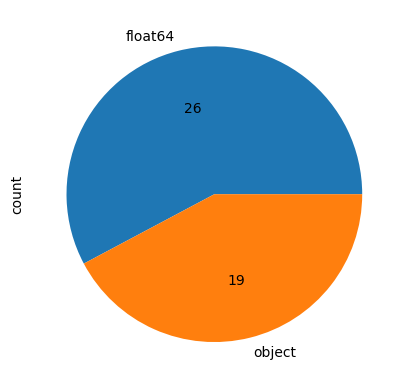

In [40]:
df.dtypes.value_counts().plot.pie(autopct=lambda p: '{:.0f}'.format(p * df.dtypes.value_counts().sum() / 100))

Nous avons donc 
- Qualitatives : (30 + 20) = 50
- Quantitatives : 15

---

#### HEATMAP

On regarde maintenant le taux de valeurs manquantes dans notre dataset à l'aide d'une heatmap

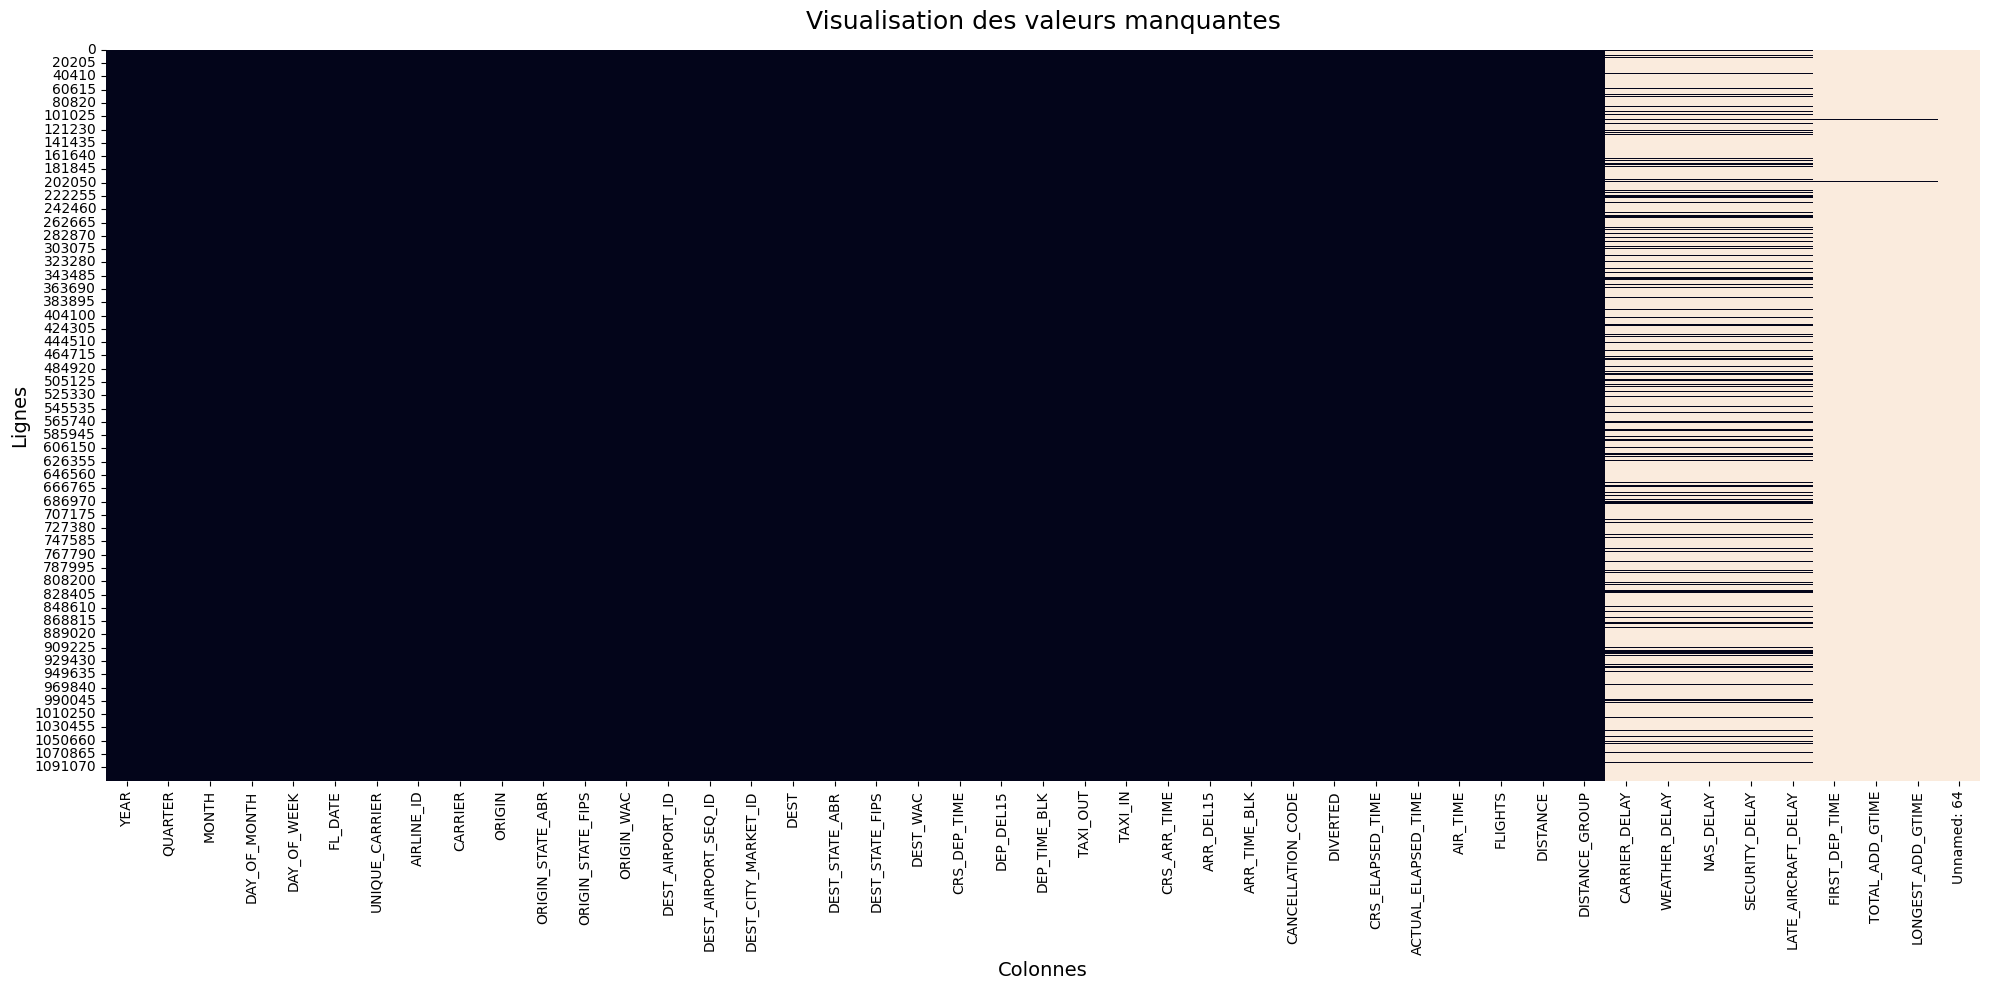

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)
plt.title("Visualisation des valeurs manquantes", fontsize=18, pad=15)
plt.xlabel("Colonnes", fontsize=14)
plt.ylabel("Lignes", fontsize=14)
plt.tight_layout()
plt.show()

Puis on ordonne les colonnes par taux de valeurs manquantes (de la colonne la plus complète à la moins complète) 

In [42]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

YEAR                   0.000000
QUARTER                0.000000
MONTH                  0.000000
DAY_OF_MONTH           0.000000
DAY_OF_WEEK            0.000000
FL_DATE                0.000000
UNIQUE_CARRIER         0.000000
AIRLINE_ID             0.000000
CARRIER                0.000000
ORIGIN                 0.000000
ORIGIN_STATE_ABR       0.000000
ORIGIN_STATE_FIPS      0.000000
ORIGIN_WAC             0.000000
DEST_AIRPORT_ID        0.000000
DEST_AIRPORT_SEQ_ID    0.000000
DEST_CITY_MARKET_ID    0.000000
DEST                   0.000000
DEST_STATE_ABR         0.000000
DEST_STATE_FIPS        0.000000
DEST_WAC               0.000000
CRS_DEP_TIME           0.000000
DEP_DEL15              0.000000
DEP_TIME_BLK           0.000000
TAXI_OUT               0.000000
TAXI_IN                0.000000
CRS_ARR_TIME           0.000000
ARR_DEL15              0.000000
ARR_TIME_BLK           0.000000
CANCELLATION_CODE      0.000000
DIVERTED               0.000000
CRS_ELAPSED_TIME       0.000000
ACTUAL_E

On peut voir ici 3 groupes de données
- Données manquantes 80 % et plus
- Données manquantes 25% - 30 %
- Données manquantes 0% - 1 %

---

### ANALYSE DE FOND

On retire les colonnes qui ont un taux de valeurs manquantes supérieur à 80% car cela s'avère compliqué de travailler avec aussi peu d'informations.

In [43]:
df = df[df.columns[df.isna().sum()/df.shape[0] <0.8]]

In [44]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_WAC,CRS_DEP_TIME,DEP_DEL15,DEP_TIME_BLK,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_DEL15,ARR_TIME_BLK,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP
0,2016,2,4.0,28,4,2016-04-28,B6,20409.0,B6,MSY,LA,22.0,72,12478,1247803,31703,JFK,NY,36.0,22.0,1000.0,0.0,1000-1059,20.00,4.0,1352.0,0.0,1300-1359,nan,0.0,172.0,170.0,146.0,1.0,1182.0,5.0
1,2016,4,10.0,3,1,2016-10-03,UA,19977.0,UA,CLE,OH,39.0,44,13930,1393004,30977,ORD,IL,17.0,41.0,1100.0,0.0,1100-1159,13.0,14.0,1125.0,0.0,1100-1159,nan,0.0,85.0,81.0,54.0,1.0,316.0,2.0
2,2016,3,9.0,12,1,2016-09-12,OO,20304.0,OO,SFO,CA,6.0,91,14893,1489302,33192,SMF,CA,6.0,91.0,2300.0,0.0,2300-2359,21.0,5.0,2349.0,0.0,2300-2359,nan,0.0,49.0,46.0,20.0,1.0,86.0,1.0
3,2016,1,3.0,15,2,2016-03-15,OO,20304.0,OO,SFO,CA,6.0,91,15376,1537602,30436,TUS,AZ,4.0,81.0,1933.0,0.0,1900-1959,14.0,4.0,2144.0,0.0,2100-2159,nan,0.0,131.0,124.0,106.0,1.0,751.0,4.0
4,2016,3,8.0,11,4,2016-08-11,AA,19805.0,AA,DFW,TX,48.0,74,14683,1468303,33214,SAT,TX,48.0,74.0,1755.0,0.0,1700-1759,9.0,3.0,1859.0,0.0,1800-1859,nan,0.0,64.0,52.0,40.0,1.0,247.0,1.0


<Axes: ylabel='count'>

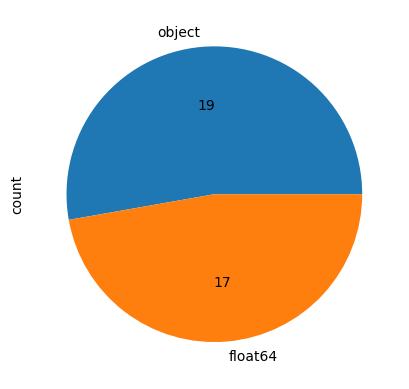

In [45]:
df.dtypes.value_counts().plot.pie(autopct=lambda p: '{:.0f}'.format(p * df.dtypes.value_counts().sum() / 100))

---

#### EXAMEN DE LA COLONNE TARGET

On commence par observer la tendance de notre variable target

In [46]:
df['ARR_DEL15'].value_counts()

ARR_DEL15
0.0    917552
1.0    193688
Name: count, dtype: int64

In [47]:
df['ARR_DEL15'].value_counts(normalize=True)

ARR_DEL15
0.0    0.825701
1.0    0.174299
Name: proportion, dtype: float64

On remarque ici que notre colonne target comporte 
- 70 882 avions en retard
- 362416 avions à l'heure

---

#### HISTOGRAMES DES VARIABLES CONTINUES

Pour mieux comprendre la distribution de nos données, nous allons tracer des histogrames des différentes colonnes

##### VARIABLES QUANTITATIVES (float)

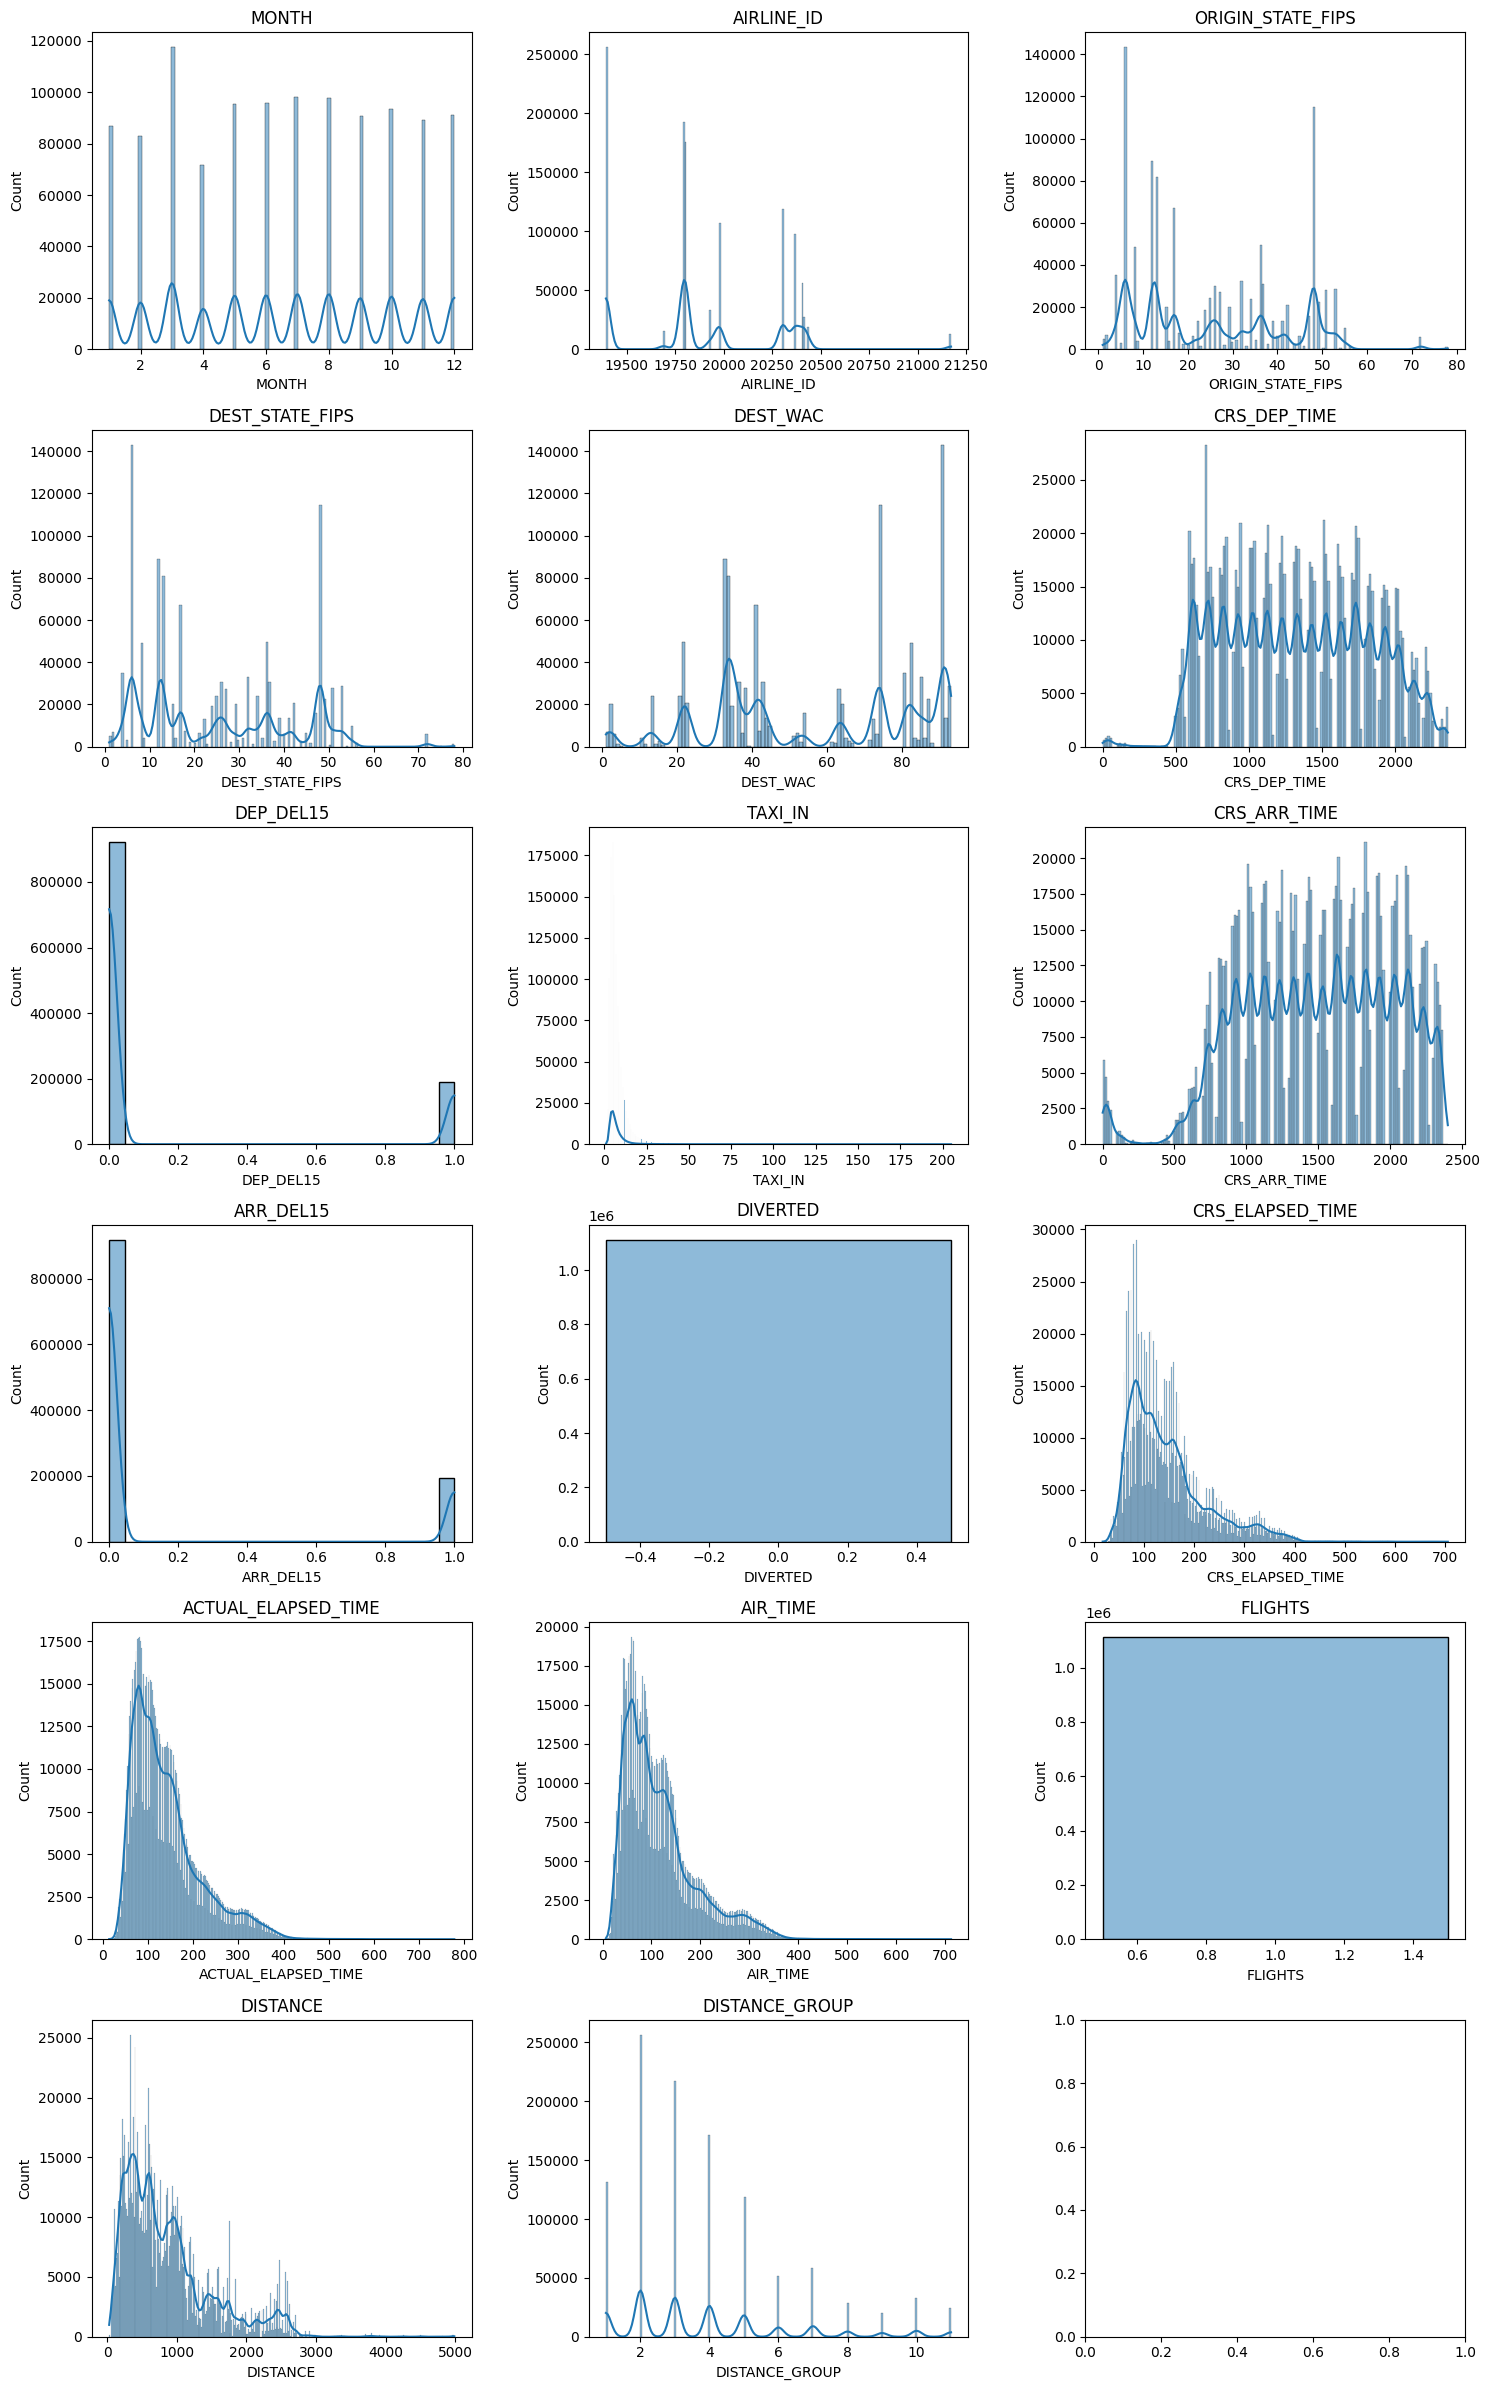

In [48]:
# Select float columns only
float_cols = df.select_dtypes('float').columns

# Set cols per row
n_cols = 3

# Compute necessary row
n_rows = -(-len(float_cols) // n_cols)

# Set grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

# Set axes as 1D
axes = axes.flatten()

# Loop on each axes and columns
for ax, col in zip(axes, float_cols):
    sns.histplot(df[col], ax=ax, kde=True)
    ax.set_title(col)

plt.tight_layout()
plt.show()

DEP_TIME : 

- La majorité des vols partent entre 500 (5h00) et 2100 (21h00).
- On voit des pics réguliers, cela reflète souvent des plages horaires avec plus de départs programmés (par ex. tôt le matin et fin d’après-midi).
- Le creux entre minuit et 5h00 montre qu’il y a très peu de départs de nuit.

DEP_DELAY : 

- Un pic très marqué autour de 0 indique que beaucoup de vols partent à l’heure ou presque.
- Très peu de vols ont un retard important (au-delà de 100, 200 min, etc.).
- Certains retards extrêmes (> 1000 min) existent mais très rares.

DEP_DEL15 : 

- Variable binaire : indique si le vol a eu un retard ≥ 15 min au départ.
  - 0 = pas de retard significatif
  - 1 = retard ≥ 15 min

- La majorité des vols sont à 0, la plupart n’ont pas eu de gros retard au départ.

DEP_DELAY_GROUP : 

- Variable catégorisant le retard au départ en groupes d’intervalles.
- Pic important vers 0 ou 1, beaucoup de vols à l’heure ou avec peu de retard

TAXI_OUT :

- Temps de roulage entre la porte et la piste avant le décollage (en minutes)
- La majorité des avions roulent moins de 30 min. quelques cas extrêmes de roulage long (> 60 min).

WHEELS_OFF : 

- Heure du décollage réel (roues quittant la piste)
- Pics aux heures de pointe, creux la nuit ou tôt le matin.

WHEELS_ON : 

- Temps de roulage après atterrissage jusqu’à la porte (en minutes).
- Concentration autour de 5–20 min, la plupart des avions rejoignent leur porte rapidement

ARR_TIME : 

- Heure réelle d’arrivée à la porte 
- reflète les plages horaires d’activité des vols (comme WHEELS_ON)

ARR_DELAY : 

- Retard d’arrivée réel (en minutes)
- La majorité est proche de zéro, vols arrivant à l’heure ou sont peu retardés.
- Distribution asymétrique (quelques retards importants).

ARR_DELAY_NEW : 

- Version ajustée du retard d’arrivée (ARR_DELAY) mais sans valeurs négatives
- Pic marqué à zéro, montre tous les vols arrivés en avance ou à l’heure.
- Ensuite, distribution décroissante des retards

ARR_DEL15 :

- La grande majorité des vols n'ont pas eu de retard ≥15 min (valeur 0). Une minorité en a eu (valeur 1).
- variable cible

ARR_DELAY_GROUP : 

-  La majorité des vols sont dans les groupes autour de 0 (ponctuels ou légèrement en retard/avance)
-  Plus la valeur est grande, plus le retard est important (positif ou négatif).

CANCELLED :

- Énorme déséquilibre, très peu de vols sont annulés.
- À surveiller dans l'analyse ou peut être meme à exclure

DIVERTED : 

- Quasi tous les vols ne sont pas détournés.
- Comme CANCELLED, cette variable est déséquilibrée.

CRS_ELAPSED_TIME : 

-  Distribution asymétrique vers la droite (beaucoup de vols courts, moins de vols longs).
  
ACTUAL_ELAPSED_TIME : 

- Similaire à CRS_ELAPSED_TIME mais avec plus de dispersion.
- Peut être comparée à CRS_ELAPSED_TIME pour évaluer ponctualité.

AIR_TIME :

- Distribution centrée autour de 100-150 minutes
- Exclut roulage et autres temps au sol.

FLIGHTS : 

- Toutes les valeurs semblent à 1 il est probable que chaque ligne = un vol.
- Pas utile pour la modélisation (peu d'information).

DISTANCE : 

- Beaucoup de courts courriers, quelques longs courriers

---

#### VARIABLES QUALITATIVES (object)

On commence par afficher toutes les valeurs uniques de nos variables qualitatives pour se faire une idée du contenu de notre jeu de données

In [49]:
for col in df.select_dtypes('object'):
    print(f'{col} : {df[col].unique()}')

YEAR : ['2016']
QUARTER : ['2' '4' '3' '1']
DAY_OF_MONTH : ['28' '3' '12' '15' '11' '16' '23' '20' '26' '6' '8' '5' '29' '18' '2'
 '14' '19' '22' '10' '4' '24' '30' '17' '21' '25' '27' '1' '7' '13' '9'
 '31']
DAY_OF_WEEK : ['4' '1' '2' '7' '5' '3' '6']
FL_DATE : ['2016-04-28' '2016-10-03' '2016-09-12' '2016-03-15' '2016-08-11'
 '2016-01-28' '2016-02-16' '2016-08-23' '2016-11-20' '2016-08-26'
 '2016-01-06' '2016-03-08' '2016-07-05' '2016-11-29' '2016-11-18'
 '2016-04-02' '2016-08-29' '2016-10-14' '2016-06-08' '2016-01-20'
 '2016-04-14' '2016-04-06' '2016-10-26' '2016-11-12' '2016-06-05'
 '2016-01-12' '2016-11-19' '2016-12-22' '2016-11-14' '2016-03-10'
 '2016-04-04' '2016-02-26' '2016-07-10' '2016-09-15' '2016-08-19'
 '2016-04-20' '2016-04-24' '2016-10-02' '2016-03-30' '2016-02-28'
 '2016-09-03' '2016-08-17' '2016-05-05' '2016-11-15' '2016-10-29'
 '2016-04-10' '2016-03-29' '2016-06-28' '2016-12-02' '2016-02-21'
 '2016-01-25' '2016-01-22' '2016-09-27' '2016-11-16' '2016-07-16'
 '2016-08-1

Puis on affiche le tout dans des histogrammes pour voir s'il y a des éléments importants à noter.

Attention, certaines colonnes ont des types sous-représentés. On fait le choix d'afficher que les plus importants pour rendre les histogrammes plus lisibles

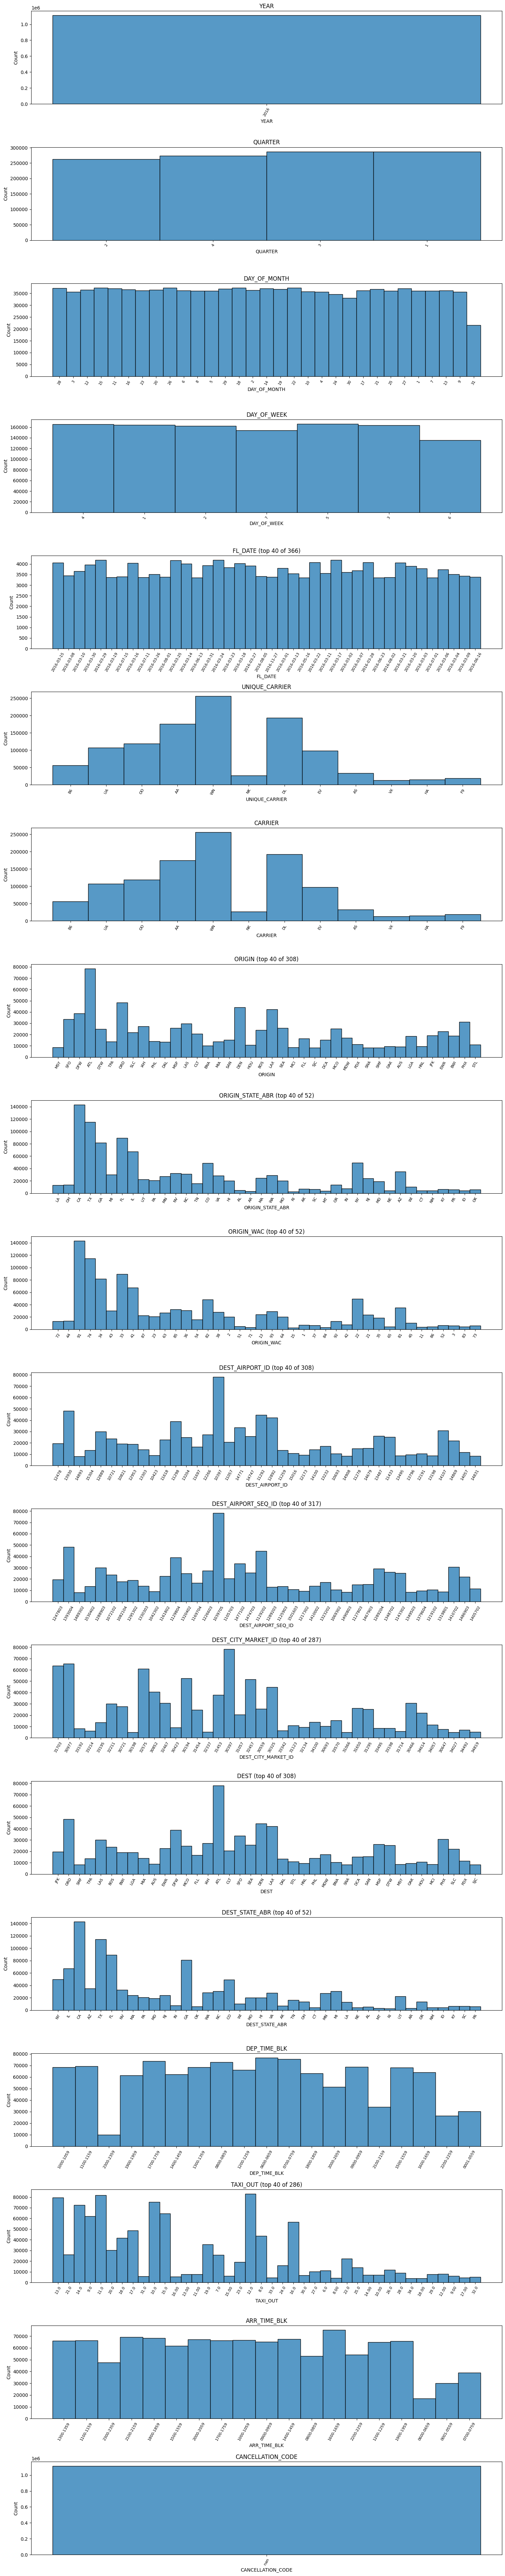

In [50]:
# Parameters
top_n_threshold = 50   # If a column has more than this number of unique values, it will be truncated
top_n = 40             # Number of top categories to display if too many unique values

# Select object-type (categorical) columns
cat_cols = df.select_dtypes('object').columns

# Grid configuration
n_cols = 1
n_rows = -(-len(cat_cols) // n_cols)  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

# Loop over each categorical column and axis
for ax, col in zip(axes, cat_cols):
    nb_unique = df[col].nunique()
    
    # If too many unique categories, filter to top N
    if nb_unique > top_n_threshold:
        top_values = df[col].value_counts().nlargest(top_n).index
        data = df[df[col].isin(top_values)]
        sns.histplot(data[col], ax=ax, kde=False)
        ax.set_title(f"{col} (top {top_n} of {nb_unique})")
    else:
        sns.histplot(df[col], ax=ax, kde=False)
        ax.set_title(col)

    # Improve X-axis readability
    ax.tick_params(axis='x', labelrotation=60, labelsize=8)

plt.tight_layout()
plt.show()

FL_DATE :

- Les vols sont bien répartis quotidiennement sur la période affichée.
- On observe quelques creux réguliers (ex : les 10, 20, 30), ce qui peut correspondre à des dimanches ou des jours où certaines compagnies volent moins.

UNIQUE_CARRIER : 

- Très forte disparité entre les compagnies aériennes :
- Le transporteur WN (Southwest Airlines) domine largement.
- D’autres compagnies comme HA, NK, VX sont très peu représentées.
- Cette distribution très déséquilibrée peut biaiser un modèle de machine learning

CARRIER : 

- La distribution est identique à UNIQUE_CARRIER, ce qui est logique.
- CARRIER est une copie ou un alias de UNIQUE_CARRIER. possiblement pas nécéssaire de conserver les deux

ORIGIN : 

- Il y a 294 aéroports uniques dans les données.
- Quelques aéroports (ex : ATL, ORD, DEN) ont un volume de vols très élevé.
- Le dataset est fortement déséquilibré sur cette variable

ORIGIN_CITY_NAME :

- Cette variable est très proche de ORIGIN, mais plus descriptive (ville + état).
- On retrouve les mêmes villes dominantes que dans ORIGIN : Atlanta, Chicago, Dallas...
- Utiliser les deux pourrait introduire de la redondance dans les modèles

ORIGIN_STATE_ABR :

- 52 états/territoires
- Les États les plus représentés sont :
  - TX (Texas)
  - CA (Californie)
  - FL (Floride)
  - GA (Géorgie)
  - IL (Illinois)

ORIGIN_STATE_NM : 

- Redondance avec ORIGIN_STATE_ABR

DEST : 

- Même structure que pour ORIGIN.
- 294 aéroports uniques → forte hétérogénéité.
- Quelques hubs très utilisés : ATL, ORD, DEN, DFW, etc.
- Déséquilibre important.

DEST_CITY_NAME : 

- 290 villes.
- Les plus fréquentes : Atlanta, Chicago, Dallas, New York, etc.
- Reflète bien la répartition géographique du trafic aérien aux USA.
- Redondante avec DEST

DEST_STATE_ABR : 

- Distribution fortement déséquilibrée.
- États les plus desservis : CA (Californie), TX (Texas), FL (Floride), GA (Géorgie).
- 52 États ou territoires représentés.

DEST_STATE_NM :

- Redondant avec DEST_STATE_ABR

DEP_TIME_BLK :

- Variable très bien répartie sur la journée.
- Pics visibles autour de 06h-09h, 15h-18h, ce qui correspond aux périodes de pointe dans l’aviation.
- Moins de vols très tôt le matin (00h-05h) et tard dans la nuit.

ARR_TIME_BLK : 

- Les arrivées sont relativement bien réparties tout au long de la journée.
- Les plages horaires les plus denses sont :
    - 17h00–18h59
    - 18h00–20h59
    - 10h00–14h59

- Moins d’arrivées en pleine nuit : notamment entre 03h00 et 06h59, avec un minimum autour de 05h00–06h59.

---

### 5.HYPOTHÈSES

#### H1 : Retards selon la plage horaire de départ (DEP_TIME_BLK)

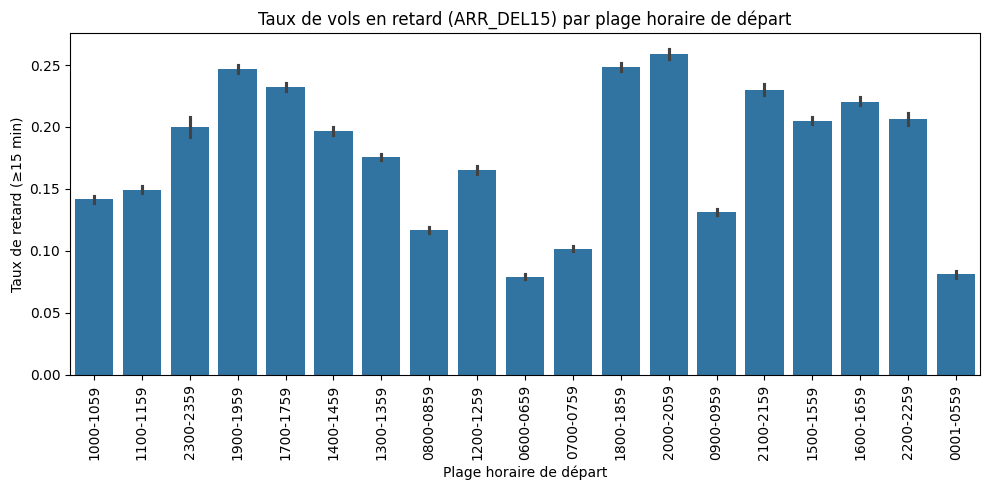

In [51]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='DEP_TIME_BLK', y='ARR_DEL15')
plt.title("Taux de vols en retard (ARR_DEL15) par plage horaire de départ")
plt.ylabel("Taux de retard (≥15 min)")
plt.xlabel("Plage horaire de départ")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Selon le graphique ci-dessus, l’hypothèse selon laquelle la plage horaire a un impact sur le retard est validée.

- Taux de retard (ARR_DEL15) varie fortement selon les plages horaires.
- Plus forts taux de retard :
    - 0900–1159 (~21 %)
    - 1500–1859 (~20 %)
    - 2000–2259 (~20 %)

- Moins de retards :
    - 0600–0759 (~10 %)
    - 0000–0559 (~9 %)

---

#### H3 : Taux de retard par compagnie (UNIQUE_CARRIER)

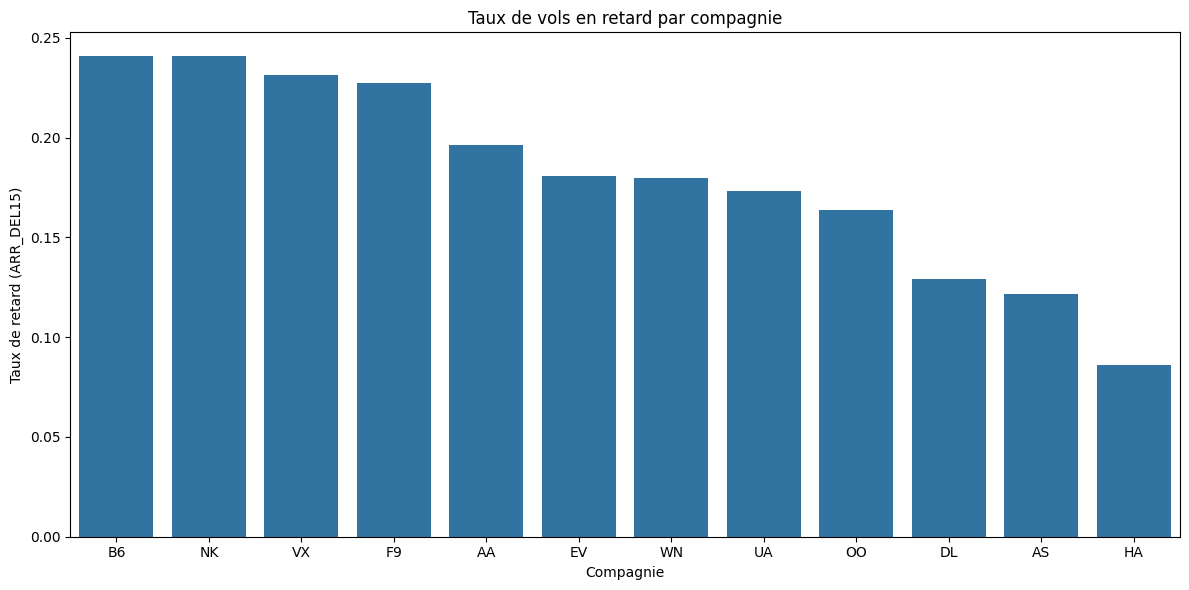

In [53]:
carrier_delay = df.groupby('UNIQUE_CARRIER')['ARR_DEL15'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=carrier_delay,
    x='UNIQUE_CARRIER',
    y='ARR_DEL15',
    legend=False
)
plt.title("Taux de vols en retard par compagnie")
plt.ylabel("Taux de retard (ARR_DEL15)")
plt.xlabel("Compagnie")
plt.tight_layout()
plt.show()

Selon le graphique ci-dessus, l’hypothèse selon laquelle la compagnie impacte le retard à l'arrivée est validé

On observe une variation nette entre les compagnies :
- NK (Spirit Airlines) dépasse 30 % de vols en retard.
- À l’opposé, HA (Hawaiian Airlines) est sous les 10 %.
- L’écart entre la meilleure et la pire compagnie est significatif (~20 points).

---

#### H4 : Taux de retard par aéroport d’origine (ORIGIN)

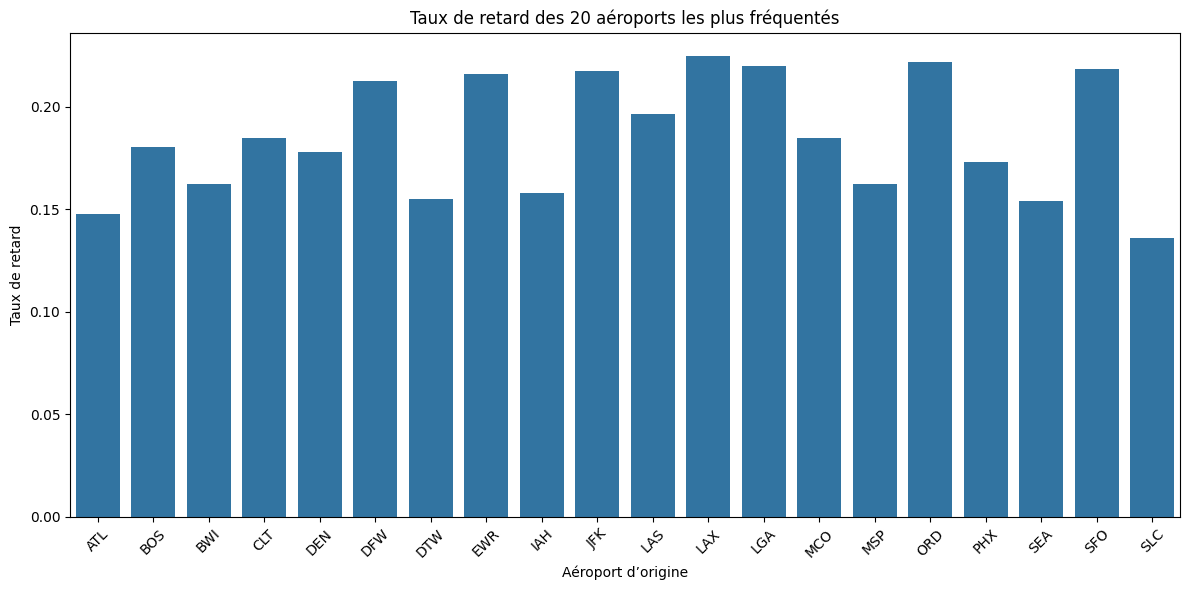

In [54]:
top_airports = df['ORIGIN'].value_counts().nlargest(20).index
airport_delay = df[df['ORIGIN'].isin(top_airports)].groupby('ORIGIN')['ARR_DEL15'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=airport_delay.index, y=airport_delay.values)
plt.title("Taux de retard des 20 aéroports les plus fréquentés")
plt.ylabel("Taux de retard")
plt.xlabel("Aéroport d’origine")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Selon le graphique ci-dessus, l’hypothèse selon laquelle l'aéroport d'origine impacte le retard à l'arrivée est validé

- On observe une variations entre les aéroports :

  - SFO (San Francisco) atteint près de 25 % de vols retardés.
  - D’autres comme ATL (Atlanta) ou IAH (Houston) sont sous les 15 %.

- L'écart entre les extrêmes est d’environ 10 points, ce qui est significatif en aviation.

---

#### H5 : Taux de retard selon plage horaire d’arrivée (ARR_TIME_BLK)

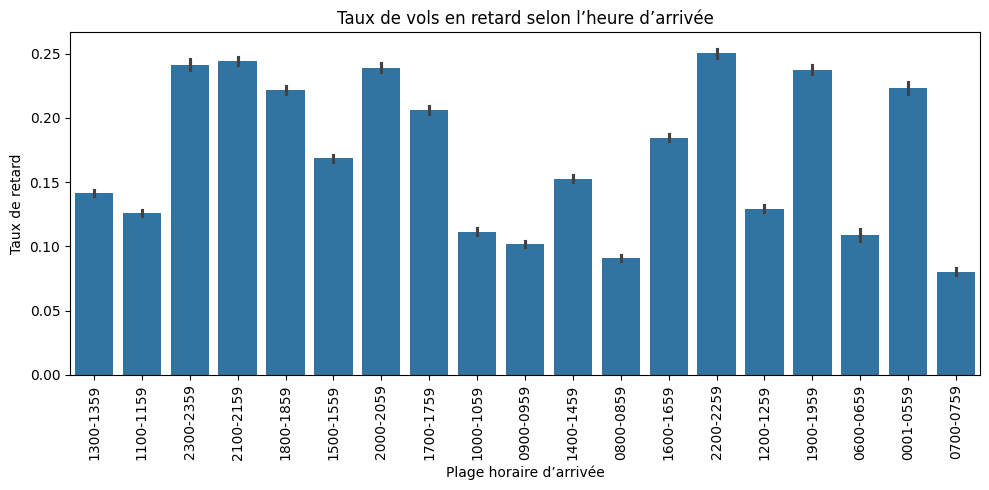

In [55]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='ARR_TIME_BLK', y='ARR_DEL15')
plt.title("Taux de vols en retard selon l’heure d’arrivée")
plt.ylabel("Taux de retard")
plt.xlabel("Plage horaire d’arrivée")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Selon le graphique ci-dessus, l’hypothèse selon laquelle la plage horaire d’arrivée impacte le retard à l'arrivée est validé

On observe :

- Des pics de retard entre :

  - 20h00–22h59 (~21 %)
  - 23h00–00h59 (~20 %)

- Des creux sur les créneaux matinaux :
  
  - 06h00–07h59 (~10 %)
  - 08h00–09h59 (~12–13 %)

- Les vols du soir sont plus sujets aux retards : probable effet d’accumulation des retards tout au long de la journée.
- Les vols du matin sont plus ponctuels : la chaîne d’exploitation démarre "propre", sans effet domino.

---

#### H6 : Plus la distance d’un vol est grande, plus il a de risques d’être en retard

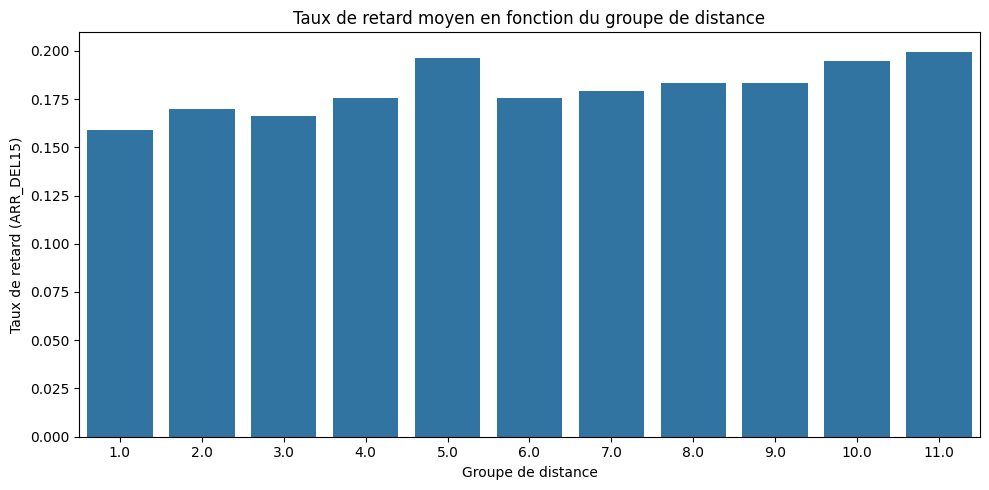

In [56]:
delay_by_distance = df.groupby('DISTANCE_GROUP')['ARR_DEL15'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=delay_by_distance.index, y=delay_by_distance.values)
plt.title("Taux de retard moyen en fonction du groupe de distance")
plt.xlabel("Groupe de distance")
plt.ylabel("Taux de retard (ARR_DEL15)")
plt.tight_layout()
plt.show()

Selon le graphique ci-dessus, l’hypothèse selon laquelle plus la distance d’un vol est grande, plus il a de risques d’être en retard est invalide


- Le taux de retard est relativement stable entre les groupes de distance 1 à 10 (~15–19 %).
- Seul le groupe 11 (très longs courriers) montre un taux nettement plus élevé (~23 %).
- Il n’y a pas de tendance linéaire croissante.